# **GEOET**: 
# 1. Priestley-Taylor Valpolicella

## **PERISSINI FEDERICO 218299**
## **FINOTTI JACOPO 217936**
    - Author Concetta D'Amato, Niccolò Tubini, Michele Bottazzi and Riccardo Rigon 
    - Licence Creative Commons 4.0

---
## 1. Priestley-Taylor

### **Descrizione delle componenti**
Le componenti di GEOET offrono formulazioni di Priestley Taylor per poter modellizzare l'evapotraspirazione: 

\begin{equation}
ET_{0}^{PT} = \alpha\dfrac{\Delta\cdot (R_{n} - G)}{\Delta+\gamma}
\end{equation}
con:
\begin{equation}
 G =  \begin{cases}
   G_{giorno}\cdot R_{n} \quad giorno\\G_{notte}\cdot R_{n} \quad notte
   \end{cases} 
\end{equation}
Dove:
- $ET_{0}$ o $ET$ sono espressi in [$mm \cdot giorno^{−1}$] o [$mm\cdot ora^{−1}$]; 
- $R_{n}$ è la radiazione netta espressa in [$MJ \cdot m^{2} \cdot giorno^{−1}$] o [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ è il flusso di calore al livello della superficie del suolo [$MJ \cdot m^{2} \cdot giorno^{−1}$] o [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\Delta$ è la pendenza della saturazione alla pressione di vapore espressa in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ è la costante psicometrica espressa in ($kP_{a} \cdot$ °$C^{−1}$).

___
#### **Radiazione netta**
La radiazione netta è data in serie temporali di valori ($W/m^{2}$). La conversione da ($W/m^{2}$) a ($MJ\cdot m^{2}$) viene fatta automaticamente dalle componenti.
- #### **$G_{giorno}$**
$G_{morn}$ è il coefficiente del flusso di calore del suolo durante il giorno. 
- #### **$G_{notte}$**
$G_{night}$ è il coefficiente del flusso di calore durante la notte.
- #### **doHourly**
doHourly è un campo booleano per poter impostare gli step temporali della simulazione(”true” è uno step orario, ”false” is daily).
- #### **Start Date**
Start Date consiste in una stringa di valori contenenti il primo giorno di simulazione.
- #### **$\alpha$**
E' il parametro dell'aquazione di Priestley-Taylor (1972). Il suo valore adimensionale è pari a 1.26. 

# Descrizione input

In [1]:
# librerie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import os
import plotly.graph_objects as go
from GEOSPACE_Output import*

In [3]:
oms_project_path = os.path.dirname(os.getcwd())
os.chdir(oms_project_path+'/output/Vite_Valpolicella/1') 

# Lettura degli output

## 1. Evapotraspirazione Effettiva
tutti gli stress sono "attivati" 

Stress Idrico: true

Stress Temperatura: true

Stress Radiazione: true 

Stress Deficit Pressione di Vapore: true

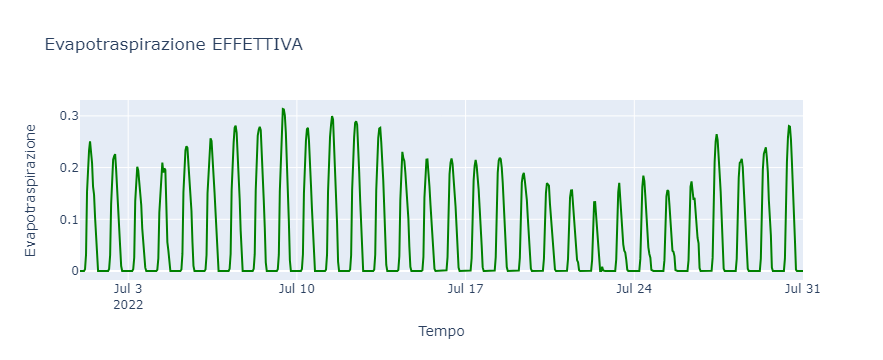

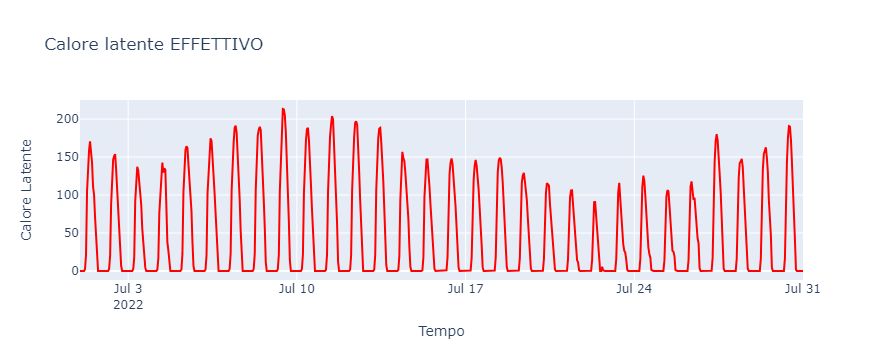

In [4]:
#grafico evapotraspirazione

df3= pd.read_csv('Effettiva3_Evapotraspirazione_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['Tempo','Evapotraspirazione']
fig3 = px.line(df3, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione EFFETTIVA ')
fig3.update_traces(line_color='green')
fig3.show()

#grafico calore latente

df4 = pd.read_csv('Effettiva3_Calore_Latente_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df4.columns = ['Tempo','Calore Latente']
fig4 = px.line(df4, x='Tempo', y='Calore Latente', title='Calore latente EFFETTIVO')
fig4.update_traces(line_color='red')
fig4.show()

## 2. Potenziale
tutti gli stress sono "disattivati"

Stress Idrico:false

Stress Temperatura:false

Stress Radiazione: false

Stress Deficit Pressione di Vapore: false

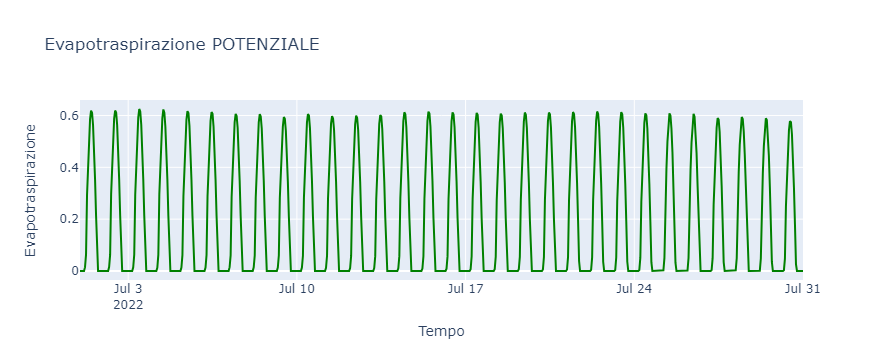

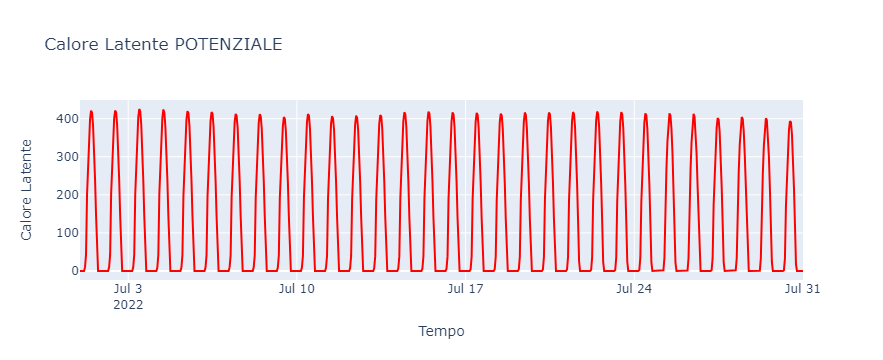

In [5]:
# grafico Evapotraspirazione

df1 = pd.read_csv('Potenziale3_Evapotraspirazione_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Tempo','Evapotraspirazione']
fig1 = px.line(df1, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione POTENZIALE ')
fig1.update_traces(line_color='green')
fig1.show()

#grafico calore latente

df2= pd.read_csv('Potenziale3_Calore_Latente_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Tempo','Calore Latente']
fig2 = px.line(df2, x='Tempo', y='Calore Latente', title='Calore Latente POTENZIALE ')
fig2.update_traces(line_color='red')
fig2.show()

# Confronto Evapotraspirazione EFFETTIVA-POTENZIALE

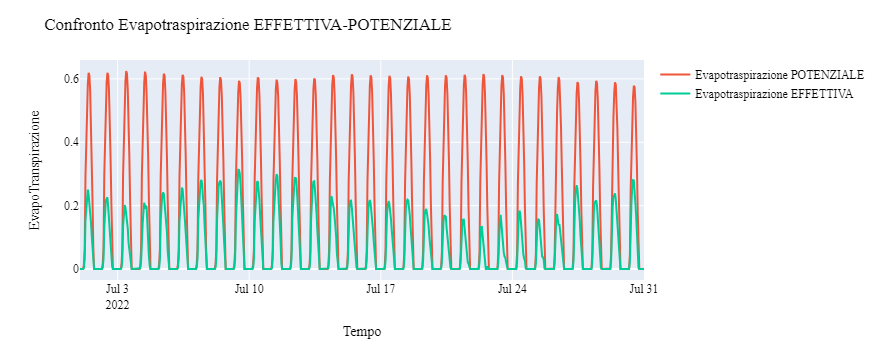

In [6]:
fig = px.line()
fig.add_trace(go.Scatter(x=df1['Tempo'], y=df1['Evapotraspirazione'], mode='lines', name='Evapotraspirazione POTENZIALE'))
fig.add_trace(go.Scatter(x=df3['Tempo'], y=df3['Evapotraspirazione'], mode='lines', name='Evapotraspirazione EFFETTIVA'))

fig.update_layout(
    title='Confronto Evapotraspirazione EFFETTIVA-POTENZIALE',
    xaxis_title="Tempo",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="EvapoTranspirazione ",
    font=dict(size=12))
fig.show()

# 3. Stress Idrico
Solo lo stress Idrico viene "attivato"

Stress Idrico: True

Stress Temperatura: false

Stress Radiazione: false

Stress Deficit Pressione di Vapore: false

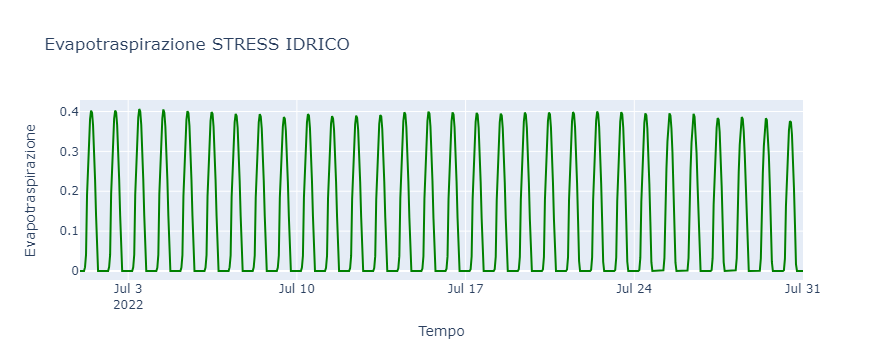

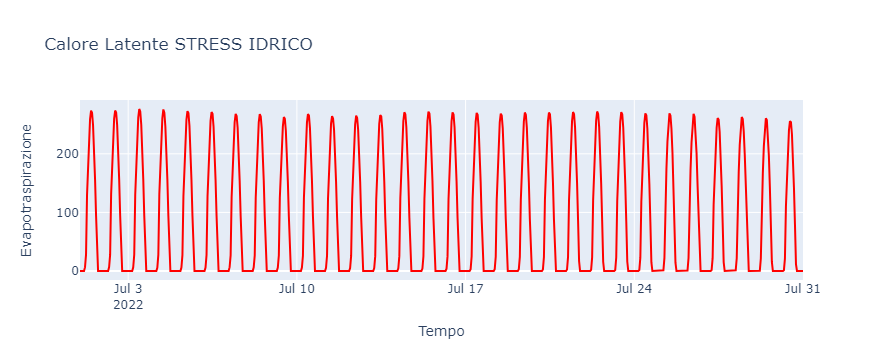

In [7]:
#grafico Evapotraspirazione

df = pd.read_csv('Idrico3_Evapotraspirazione_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig2 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione STRESS IDRICO ')
fig2.update_traces(line_color='green')
fig2.show()

#grafico Calore Latente

df = pd.read_csv('Idrico3_Calore_Latente_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig1 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Calore Latente STRESS IDRICO ')
fig1.update_traces(line_color='red')
fig1.show()

# 4. Ambientale
Solo lo stress Idrico viene "disattivato", si ipotizza come condizione ambientale ideale il caso in cui ci sia una disponibnilità idrica senza fine.

Stress Idrico: False

Stress Temperatura: True

Stress Radiazione: True

Stress Deficit Pressione di Vapore:  True

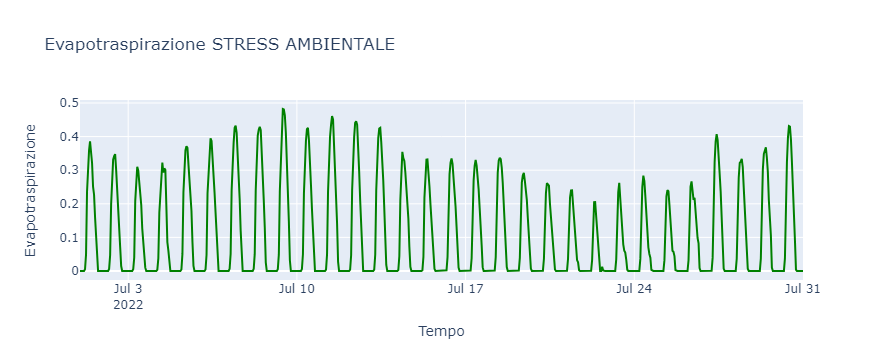

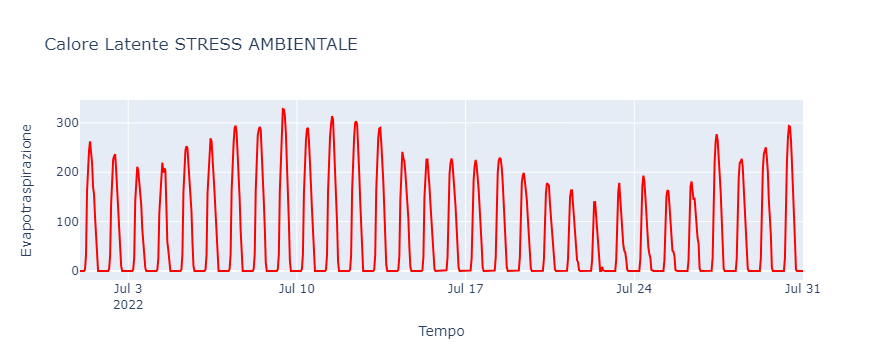

In [8]:
# grafico evapotraspirazione 

df = pd.read_csv('Ambientale3_Evapotraspirazione_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig2 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione STRESS AMBIENTALE ')
fig2.update_traces(line_color='green')
fig2.show()

#grafico calore latente

df = pd.read_csv('Ambientale3_Calore_Latente_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig1 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Calore Latente STRESS AMBIENTALE ')
fig1.update_traces(line_color='red')
fig1.show()

### Grafico di confronto

Nel seguente grafico vengono messi contemporaneamente a confronto 4 differenti variabili:

    -Evapotraspirazione POTENZIALE
    -Evapotraspirazione AMBIENTALE
    -Evapotraspirazione STRESS IDRICO
    -Evapotraspirazione EFFETTIVA

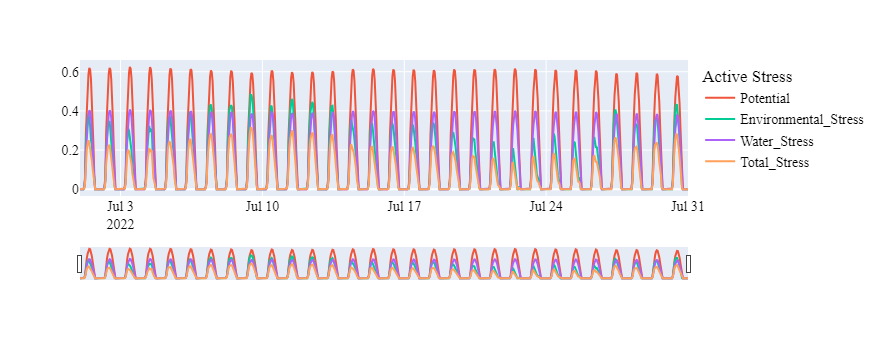

In [9]:
show_stress('Potenziale3_Evapotraspirazione_PT_1.csv',
            'Ambientale3_Evapotraspirazione_PT_1.csv',
            'Idrico3_Evapotraspirazione_PT_1.csv',
            'Effettiva3_Evapotraspirazione_PT_1.csv')